In [1]:
import pandas as pd
file_path = "./ref/광주교통공사역일시간대별승하차량20250131.csv"
df = pd.read_csv(file_path,encoding="utf-8")
df.head()
# data.tail()

,역번호,일자,역명,구분,총승하차승객,5_6,6_7,7_8,8_9,9_10,...,14_15,15_16,16_17,17_18,18_19,19_20,20_21,21_22,22_23,23_24
0,100,2025-01-01,녹동,승차,89,0,0,2,6,12,...,6,7,5,3,3,2,4,2,0,0
1,100,2025-01-01,녹동,하차,62,0,0,1,3,4,...,7,6,7,10,3,3,6,0,3,0
2,101,2025-01-01,소태,승차,1238,17,17,39,62,92,...,108,118,97,90,67,62,39,34,16,5
3,101,2025-01-01,소태,하차,1124,5,42,38,40,42,...,85,82,76,106,113,53,64,59,64,17
4,102,2025-01-01,학동증심사,승차,1064,14,18,32,45,79,...,64,90,110,92,56,30,17,9,10,7


In [2]:
columns = ['num', 'date', 'name', 'type','total']
time_col = [f"{i}_{i+1}" for i in range(5, 24)] 
columns = columns + time_col 

df.columns = columns
df = df.loc[:,:'total']

In [3]:
df.head()

,num,date,name,type,total
0,100,2025-01-01,녹동,승차,89
1,100,2025-01-01,녹동,하차,62
2,101,2025-01-01,소태,승차,1238
3,101,2025-01-01,소태,하차,1124
4,102,2025-01-01,학동증심사,승차,1064


In [4]:
data = df.groupby(['date','num','name']).sum().reset_index()
data[data['date']=='2025-01-01']
data

,date,num,name,type,total
0,2025-01-01,100,녹동,승차하차,151
1,2025-01-01,101,소태,승차하차,2362
2,2025-01-01,102,학동증심사,승차하차,2050
3,2025-01-01,103,남광주,승차하차,3404
4,2025-01-01,104,문화전당,승차하차,4827
...,...,...,...,...,...
615,2025-01-31,115,공항,승차하차,1934
616,2025-01-31,116,송정공원,승차하차,4839
617,2025-01-31,117,광주송정,승차하차,9760
618,2025-01-31,118,도산,승차하차,2893


In [5]:
gdata = data[['name' ,'date' ,'total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,True])
gdata.head(10)

,name,date,total
15,공항,2025-01-01,1028
35,공항,2025-01-02,2060
55,공항,2025-01-03,2135
75,공항,2025-01-04,1431
95,공항,2025-01-05,1052
115,공항,2025-01-06,2275
135,공항,2025-01-07,2252
155,공항,2025-01-08,2197
175,공항,2025-01-09,2236
195,공항,2025-01-10,2737


In [6]:
mdata = gdata.groupby(by="name").sum().reset_index()
mdata

,name,date,total
0,공항,2025-01-012025-01-022025-01-032025-01-042025-0...,58562
1,광주송정,2025-01-012025-01-022025-01-032025-01-042025-0...,286840
2,금남로4가,2025-01-012025-01-022025-01-032025-01-042025-0...,219610
3,금남로5가,2025-01-012025-01-022025-01-032025-01-042025-0...,111828
4,남광주,2025-01-012025-01-022025-01-032025-01-042025-0...,205923
5,녹동,2025-01-012025-01-022025-01-032025-01-042025-0...,9302
6,농성,2025-01-012025-01-022025-01-032025-01-042025-0...,158658
7,도산,2025-01-012025-01-022025-01-032025-01-042025-0...,83264
8,돌고개,2025-01-012025-01-022025-01-032025-01-042025-0...,96626
9,문화전당,2025-01-012025-01-022025-01-032025-01-042025-0...,183198


In [7]:
tdata = mdata[['name','total']]
tdata

,name,total
0,공항,58562
1,광주송정,286840
2,금남로4가,219610
3,금남로5가,111828
4,남광주,205923
5,녹동,9302
6,농성,158658
7,도산,83264
8,돌고개,96626
9,문화전당,183198


In [8]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
1,광주송정,286840
10,상무,230741
2,금남로4가,219610
4,남광주,205923
9,문화전당,183198
15,운천,172719
6,농성,158658
14,양동시장,141279
12,송정공원,139795
13,쌍촌,127882


In [9]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"]="D2Coding"

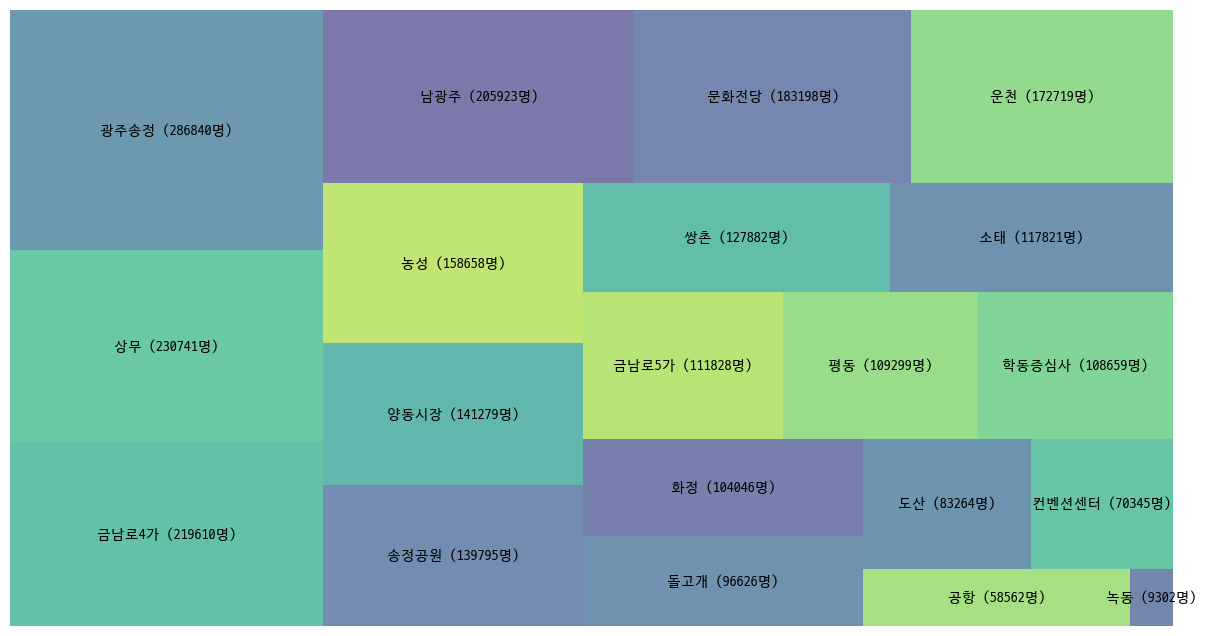

In [10]:
import squarify

plt.figure(figsize=(15,8))
squarify.plot(sizes=total_data['total'], label=[f"{str(x[0]).strip()} ({str(x[1]).strip()}명)" for x in zip(total_data['name'], total_data['total'])], alpha=0.7)
plt.rcParams['font.size']= 10
plt.rcParams['text.color']='black'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()